In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.shape

(440, 8)

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [6]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.drop('Channel',axis=1)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [8]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [9]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [10]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler() 
X=stscaler.fit_transform(df)

In [11]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [12]:
import scipy.cluster.hierarchy as sch

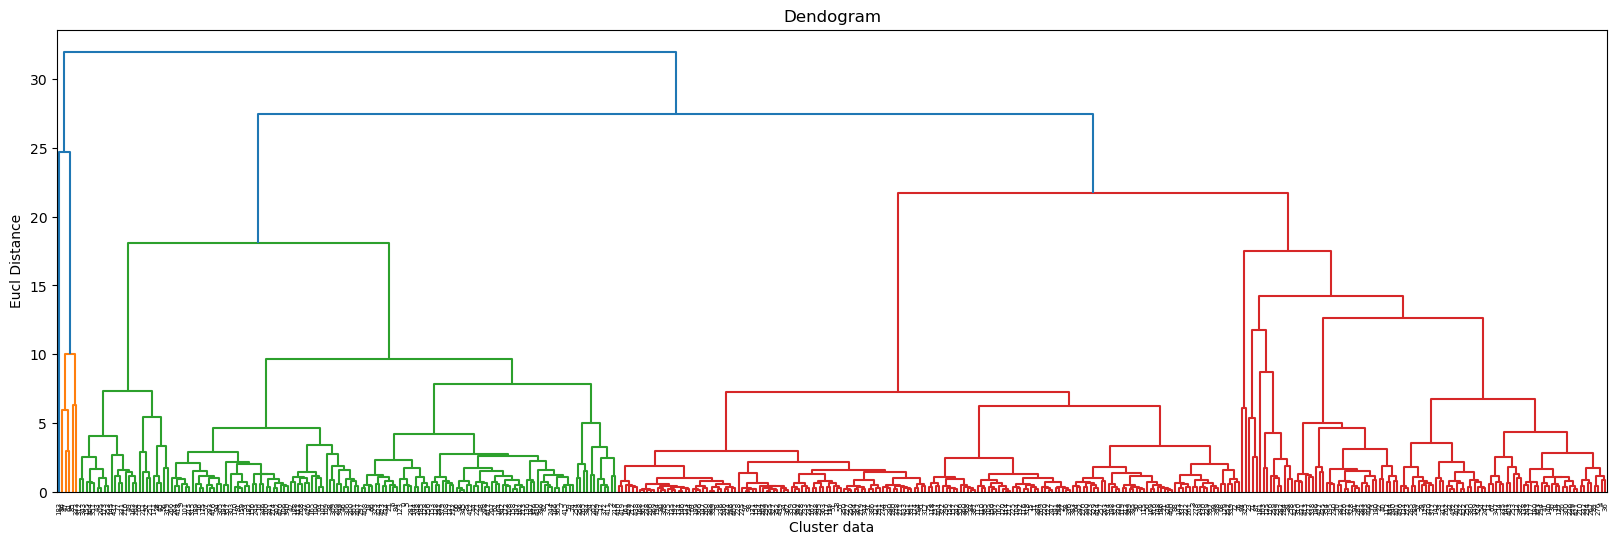

In [13]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Cluster data')
plt.ylabel('Eucl Distance')
plt.show()

In [14]:
len(set(dendo['color_list']))-1

3

In [15]:
len(set(dendo['color_list']))

4

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
group = AgglomerativeClustering(n_clusters=3)
group.fit_predict(X)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [18]:
group = AgglomerativeClustering(n_clusters=3)
cluster=group.fit_predict(X)

In [19]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [20]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [21]:
type(cluster)

numpy.ndarray

In [22]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [23]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X,cluster)

0.2646091480214908

# kmeans

In [26]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [27]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[2266.9552665832452,
 1644.0598512347563,
 1326.6746082135533,
 1070.2551995135618,
 989.3326418885057,
 856.7070228388118,
 791.8280762163155,
 710.1943394067519,
 668.2225054846901]

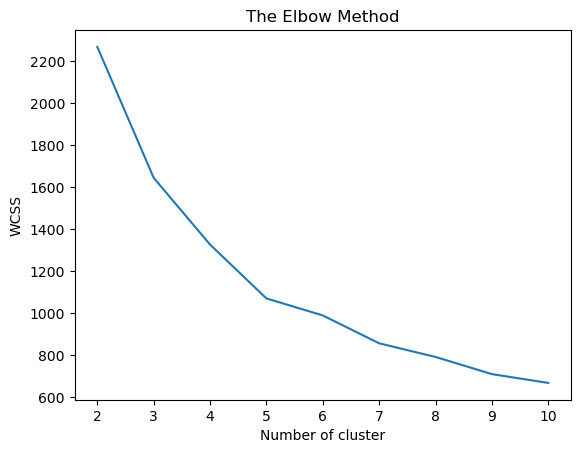

In [29]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()
          

In [30]:
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(X)

In [31]:
groups

array([2, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 2, 4, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 0, 2, 2, 4, 0, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 4,
       2, 4, 2, 2, 3, 4, 0, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       4, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 4, 0, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [32]:
type(groups)

numpy.ndarray

In [33]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [34]:
group_num=pd.DataFrame(groups,columns=['Silhouette_score'])
group_num

,Silhouette_score
0,2
1,0
2,0
3,2
4,4
...,...
435,4
436,4
437,0
438,2


In [35]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Silhouette_score
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,4
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X,groups)

0.3676564632042091

In [38]:
np.round(silhouette_score(X,groups),2)

0.37

DBSCAN

In [81]:
from sklearn.cluster import DBSCAN

In [83]:
dbscan = DBSCAN(eps=3.2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=3.2, min_samples=10)